In [3]:
"""
Given the information you have and any light research you’d like to do on the topic, what insights can you draw?

- show progress of each patient (user enters patient id)
- show the trend of scores across all patients (seasonal changes / time of the day)
- show severity level 
- group data with the length of treatment (after 1 month, 2 months etc)

What assumptions have you made about the data?



What are 2-3 additional pieces of information that would be important to collect?
- treatment measure to see how it affects the score
- more info about patients (age etc)
- score for each question
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

def load_data():
    df = pd.read_csv('phq_all_final.csv')
    return df

In [4]:
df = load_data()

In [7]:
def show_indiv_progress_byday(p_id):
    """
    displays score history of individual patient
    p_id: patient id (int)
    output: plot (x=day, y=score), redline = clinical evaluation recommended
    """
    data = df[df['patient_id'] == p_id]
    data[['day', 'time']] = data["date"].str.split("T", n = 1, expand = True)
    data['day'] = pd.to_datetime(data['day'])
    data.groupby('day')['score'].mean().plot(rot=70) # if there are more than one reports in a day, takes its mean
    plt.axhline(y=10, color='r', linestyle='-') 
    plt.xlabel("Date")
    plt.ylabel("GAD7 Score")


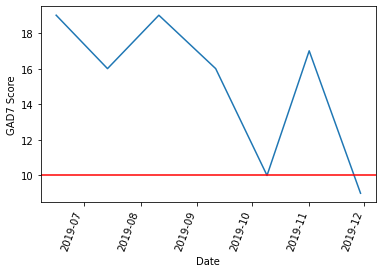

In [8]:
show_indiv_progress_byday(7561)

In [11]:
def show_indiv_trend_bytime(p_id):
    """
    displays score history of individual patient
    p_id: patient id (int)
    output: plot (x=day, y=score)
    """
    data = df[df['patient_id'] == p_id]
    data[['day', 'time_stamp']] = data["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    data[['hour', 'minute', 'second']] = data["time_stamp"].str.split(splt_char, n = 2, expand = True)
    data.groupby('hour')['score'].mean().plot.bar()
    plt.axhline(y=10, color='r', linestyle='-')
    plt.xlabel("Time of Day")
    plt.ylabel("GAD7 Score")

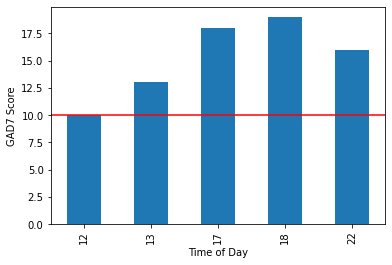

In [12]:
show_indiv_trend_bytime(7561)

In [15]:
def show_monthly_mean():
    """
    Show mean severity scores (monthly) among all patients
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['month'] = pd.to_datetime(df['day']).dt.to_period('M')
    df.groupby('month')['score'].mean().plot.bar()
    plt.xlabel("Month")
    plt.ylabel("Mean GAD7 Score")


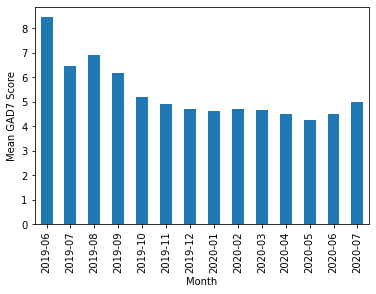

In [16]:
show_monthly_mean()

In [17]:
def show_monthly_count():
    """
    Show the number of records (monthly) among all patients
    <Business application>
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['month'] = pd.to_datetime(df['day']).dt.to_period('M')
    df.groupby('month')['score'].count().plot.line()
    plt.xlabel("Month")
    plt.ylabel("Number of reports")


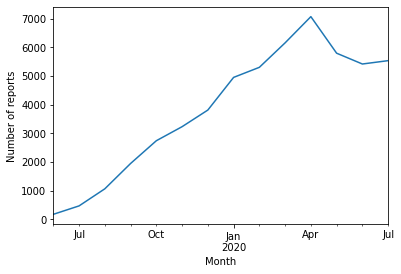

In [18]:
show_monthly_count()

In [21]:
def show_time_trend_mean():
    """
    Show time trend (hour) by the mean value of severity scores among all patients
    Shows that the score is relatively lower in the early afternoon
    """  
    df[['day', 'time_stamp']] = df["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    df[['hour', 'minute', 'second']] = df["time_stamp"].str.split(splt_char, n = 2, expand = True)
    df.groupby('hour')['score'].mean().plot.bar()
    plt.axhline(y=10, color='r', linestyle='-')


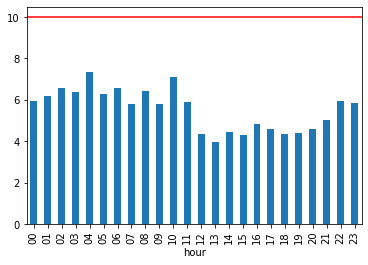

In [22]:
show_time_trend_mean()

In [23]:
def show_time_trend_count():
    """
    Show time trend (hour) by the number of records among all patients
    Most patients submit in the early afternoon
    """
    df[['day', 'time_stamp']] = df["date"].str.split("T", n = 1, expand = True)
    splt_char = ':'
    df[['hour', 'minute', 'second']] = df["time_stamp"].str.split(splt_char, n = 2, expand = True)
    df.groupby('hour')['score'].count().plot.bar()

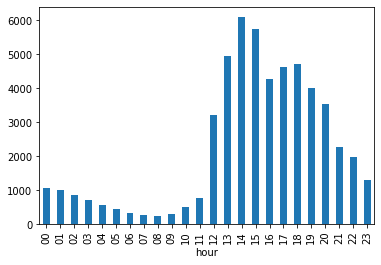

In [24]:
show_time_trend_count()

In [28]:
def progress_by_length():
    """
    group data with the length of treatment (after 1 month, 2 months etc)
    shows decrease after a couple of months
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    merged.groupby('num_month')['score'].mean().plot.line()
    plt.xlabel("Number of Months")
    plt.ylabel("Mean GAD7 Score")


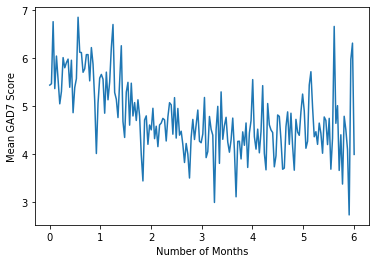

In [29]:
progress_by_length()

In [30]:
def progress_by_severeness(low, high):
    """
    group data with the length of treatment (after 1 month, 2 months etc)
    the same as the previous function but can choose the range for severeness
    understand how severeness and improvement are correlated (lower range shows more improvement over time)
    low: score low range
    high: score high range
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    group = merged[(merged['score'] <= high) & (merged['score'] >= low)]
    group.groupby('num_month')['score'].mean().plot.line()    
    plt.xlabel("Number of Months")
    plt.ylabel("Mean GAD7 Score")


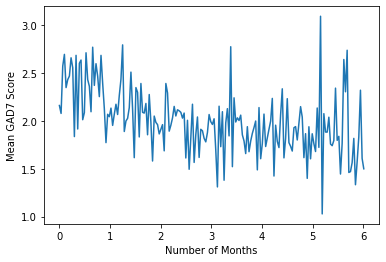

In [31]:
progress_by_severeness(0, 6)

In [32]:
def retainment():
    """
    Shows how many people stuck with the actitivities after some number of months
    Shows that a lot of users complete the activity once a month, with significant decrease over time
    <Buiness Application>
    """
    df[['day', 'time']] = df["date"].str.split("T", n = 1, expand = True)
    df['day'] = pd.to_datetime(df['day'])
    patients = df.groupby('patient_id')
    startdf = patients.agg(start_date=('day', np.min)) #find each patient's start date
    startdf.reset_index(inplace = True)
    merged = pd.merge(df, startdf, how="left", on=["patient_id"]) #join two dfs
    merged['num_month'] = (merged['day'] - merged['start_date'])/np.timedelta64(1, 'M') #calculate how long it's been
    merged.groupby('num_month')['date'].count().plot.line()
    plt.xlabel("Number of Months")
    plt.ylabel("Number of reports")

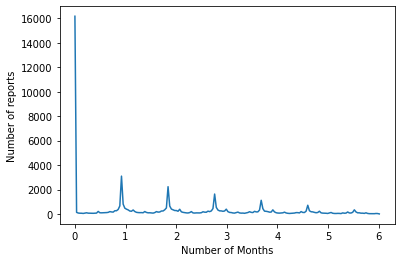

In [33]:
retainment()